In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

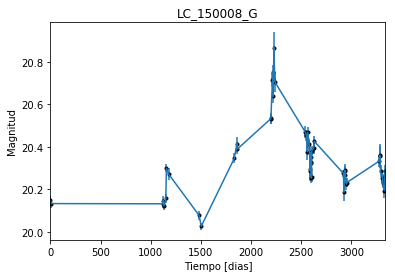

In [2]:
data = np.genfromtxt('LC_150008_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_150008_G')
plt.savefig("LC_150008_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

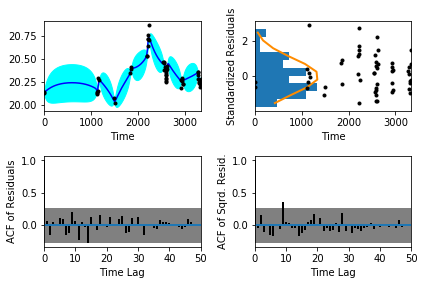

In [5]:
sample.assess_fit()

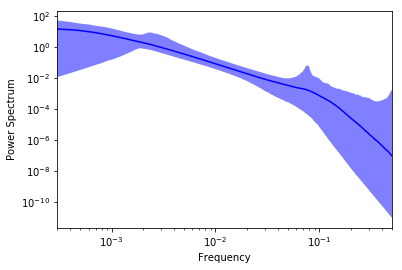

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

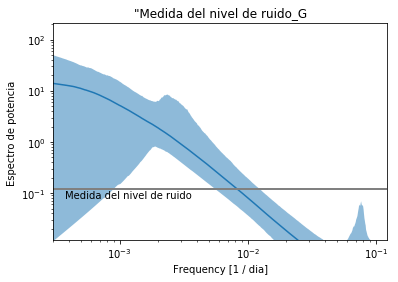

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_150008_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_150008_G')

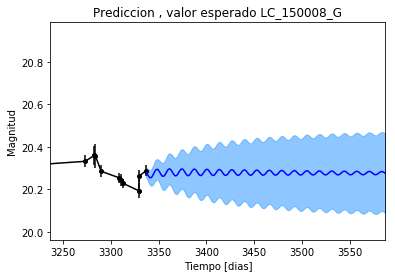

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_150008_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_150008_G')

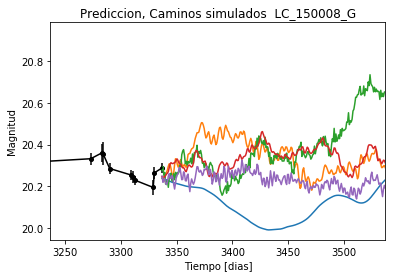

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_150008_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


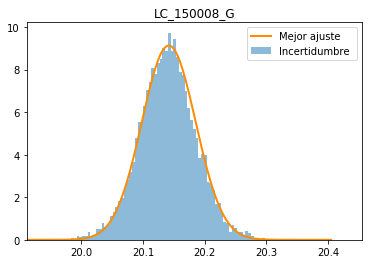

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_150008_G')
plt.savefig("Mejor_ajuste_LC_150008_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_150008_G')

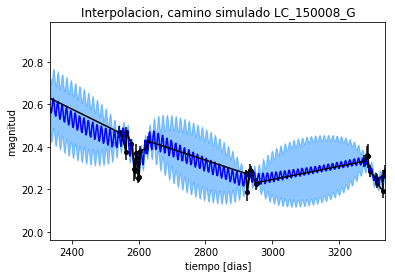

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_G')

Text(0.5,1,'Interpolacion, camino simulado LC_150008_G')

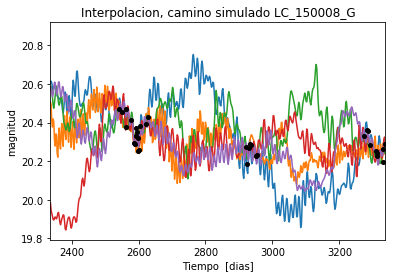

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_150008_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 721.144979113
Median: 0.0144029613814
Standard deviation: 0.143466205412
68% credibility interval: [ 0.00177258  0.10367177]
95% credibility interval: [  3.90141496e-04   5.39320791e-01]
99% credibility interval: [  3.17694220e-04   9.10472747e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 964.384326598
Median: 0.0109947313562
Standard deviation: 0.100072256933
68% credibility interval: [ 0.00099559  0.06274874]
95% credibility interval: [ 0.00035131  0.33794682]
99% credibility interval: [  3.09423457e-04   7.20640649e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 301.896349175
Median: 0.126391249992
Standard dev

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 721.144979113
Median: 0.0144029613814
Standard deviation: 0.143466205412
68% credibility interval: [ 0.00177258  0.10367177]
95% credibility interval: [  3.90141496e-04   5.39320791e-01]
99% credibility interval: [  3.17694220e-04   9.10472747e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 964.384326598
Median: 0.0109947313562
Standard deviation: 0.100072256933
68% credibility interval: [ 0.00099559  0.06274874]
95% credibility interval: [ 0.00035131  0.33794682]
99% credibility interval: [  3.09423457e-04   7.20640649e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 301.896349175
Median: 0.126391249992
Standard dev

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 260.376478625
Median: 1.42385546492
Standard deviation: 2.39516858457
68% credibility interval: [ 0.18729986  4.78735088]
95% credibility interval: [ 0.05684084  7.98605917]
99% credibility interval: [  0.02987091  11.36172745]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1981.46710555
Median: 1.71559445493
Standard deviation: 11.433614621
68% credibility interval: [  0.25852885  15.96314352]
95% credibility interval: [  0.15283743  

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4645.02464906
Median: 4.37225381236e-22
Standard deviation: 3.80218503296e+72
68% credibility interval: [  1.38771307e-66   1.50764266e+08]
95% credibility interval: [  7.94129150e-106   4.09243971e+064]
99% credibility interval: [  2.16734154e-119   3.81440554e+068]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1401.26608469
Median: 20.2966014812
Standard deviation: 0.0870937026747
68% credibility interval: [ 20.21374475  20.36847853]
95% credibility interval: [ 20.10565628  20.45694897]
99% credibility interval: [ 20.00915091  20.53990982]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 834.959572761
Median: 0.112818644501
Standard deviation: 0.270230114438
68% credibility interval: [ 0.0684311   0.55228833]
95% credibility interval: [ 0.          0.92832082]
99% credibility interval: [ 0.          0.99563787]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 834.959572761
Median: 0.112818644501
Standard deviation: 0.270230114438
68% credibility interval: [ 0.0684311   0.55228833]
95% credibility interval: [ 0.          0.92832082]
99% credibility interval: [ 0.          0.99563787]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 570.912009051
Median: 0.0
Standard deviation: 0.000883967137443
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 357.961318035
Median: 87.2936690686
Standard deviation: 2.13580221911
68% credibility interval: [ 85.0188227  89.125728 ]
95% credibility interval: [ 82.23782041  90.63359822]
99% credibility interval: [ 80.27920715  91.30911415]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 811.466848113
Median: 0.0389197850247
Standard deviation: 0.0259204591541
68% credibility interval: [ 0.0248476   0.06282438]
95% credibility interval: [ 0.01754782  0.10399323]
99% credibility interval: [ 0.01460107  0.15085459]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 985.637698742
Median: 1.11613504342
Standard deviation: 0.233200980105
68% credibility interval: [ 0.91912597  1.36832716]
95% credibility interval: [ 0.77328882  1.70291428]
99% credibility interval: [ 0.69990888  1.87845975]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 537.343900823
Median: 0.00695279144252
Standard deviation: 0.503600459033
68% credibility interval: [  4.03281494e-10   3.14530938e-01]
95% credibility interval: [  3.62790897e-67   1.77165460e+00]
99% credibility interval: [  2.42164526e-71   3.22228539e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 721.144979113
Median: (-0.0904964753314-0.538255257939j)
Standard deviation: 1.92235558103
68% credibility interval: [-0.65138895-2.62976586j -0.01113747-0.50307553j]
95% credibility interval: [ -3.38865247e+00 -5.69498910e+00j  -2.45133132e-03 -4.15097281e-03j]
99% credibility interval: [ -5.72066899e+00-3.92516833j  -1.99613166e-03-2.27221876j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 964.384326598
Median: (-0.0690819345139+4.44641195329j)
Standard deviation: 1.81059086846
68% credibility interval: [-0.39426194+1.04383743j -0.00625545+0.00239603j]
95% credibility interval: [-2.12338250+3.84782237j -0.00220732+0.j        ]
99% credibility interval: [ -4.52791874e+00+4.60172213j  -1.94416492e-03+0.j        ]
Pos